In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline

In [9]:
x = torch.linspace(-1,1, 20)
ep = torch.rand(x.shape)*0.1
y = x**2+ep
y

tensor([1.0963, 0.8276, 0.7052, 0.5493, 0.3606, 0.2503, 0.1649, 0.0836, 0.0694,
        0.0725, 0.0979, 0.0938, 0.0888, 0.1717, 0.2655, 0.3574, 0.4827, 0.7129,
        0.8408, 1.0540])

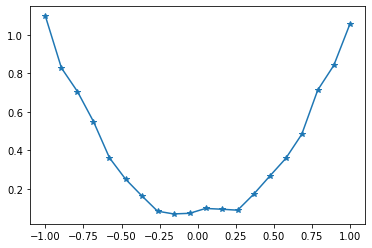

In [11]:
plt.plot(x,y, '*-')

In [12]:
n = 20
layers = []
layers.append(nn.Linear(1, n))
layers.append(nn.ReLU())
layers.append(nn.Linear(n,n))
layers.append(nn.ReLU())
layers.append(nn.Linear(n,1))
mymlp = nn.Sequential(*layers)

In [13]:
xb, yb = x[:,None], y[:,None]
print(x.shape, xb.shape)

torch.Size([20]) torch.Size([20, 1])


In [22]:
yprime = mymlp(xb)

yprime2 = yprime.squeeze().detach()

plt.plot(x,yprime2, label = 'predicted')
plt.plot(x,y, "*-", label = 'true')
plt.legend()

In [24]:
myloss_value = F.mse_loss(yprime, yb)
myloss_value

tensor(0.1366, grad_fn=<MseLossBackward0>)

In [25]:
myloss_value.backward()

In [28]:
lr = 1e-1
for name, param in mymlp.named_parameters():
#     print(param)
    param.data = param.data - param.grad *lr
    


In [30]:
mymlp.zero_grad()

In [32]:
def my_step(lr, model):
    for name, param in model.named_parameters():
    #     print(param)
        param.data = param.data - param.grad *lr
    model.zero_grad()

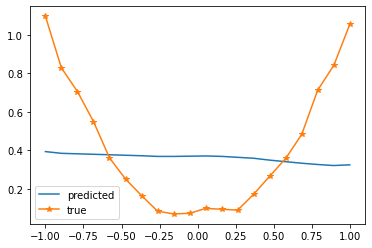

In [31]:
yprime = mymlp(xb)

yprime2 = yprime.squeeze().detach()

plt.plot(x,yprime2, label = 'predicted')
plt.plot(x,y, "*-", label = 'true')
plt.legend()

# Loop to do grad descent

In [33]:
epochs = 200
lr  = 1e-1
for i in range(epochs):
    yprime = mymlp(xb)
    myloss_value = F.mse_loss(yprime, yb)
    myloss_value.backward()
    my_step(lr, mymlp)

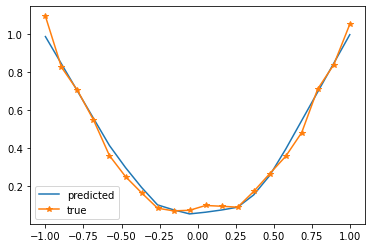

In [34]:
yprime = mymlp(xb)

yprime2 = yprime.squeeze().detach()

plt.plot(x,yprime2, label = 'predicted')
plt.plot(x,y, "*-", label = 'true')
plt.legend()